## Chapter 7 - Problem 8
***

8. Fit some of the non-linear models investigated in this chapter to the
**Auto** data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.

In [55]:
library(ISLR)
library(boot)
library(splines)
library(gam)
summary(Auto)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin       :  4  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Q

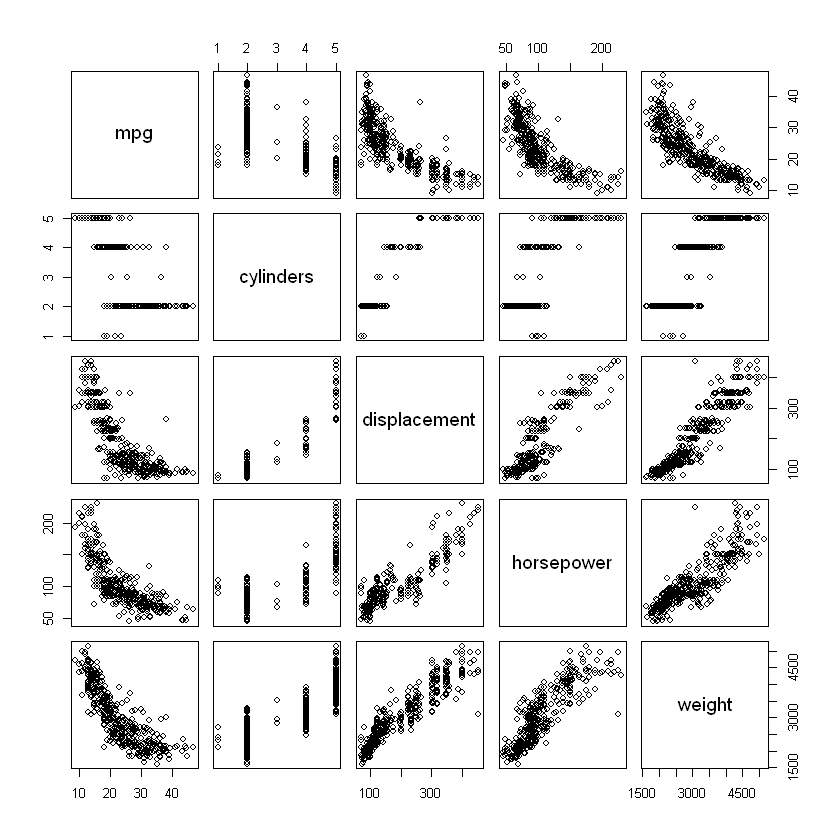

In [56]:
pairs(mpg~cylinders+displacement+horsepower+weight,data = Auto)

It seems there is a non-linear relationship between mpg and the cylinders, displacement, weight and horsepower

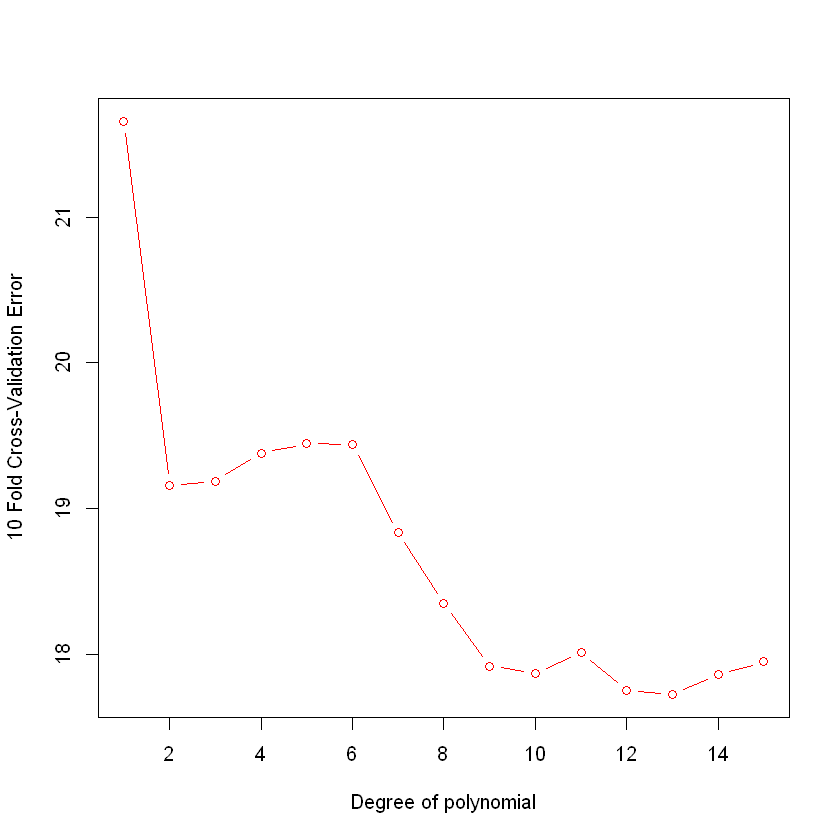

In [57]:
set.seed(200)
CV.error.10fold <- rep(0,5)
poly.model <- list()
degree = 1:15

for (d in degree){
  poly.model[[d]] <- glm(mpg~poly(displacement,d),data = Auto)
  CV.error.10fold[d] <- cv.glm(data = Auto, glmfit = poly.model[[d]], K = 10)$delta[2]   
}

plot(degree,CV.error.10fold,type = 'b', col = "red",xlab = "Degree of polynomial", 
     ylab = "10 Fold Cross-Validation Error")

The variance of the Cv error is 1.06. A polynomial of degree 2 is within this range and it is a much simpler model. Hence this is the model i would choose.

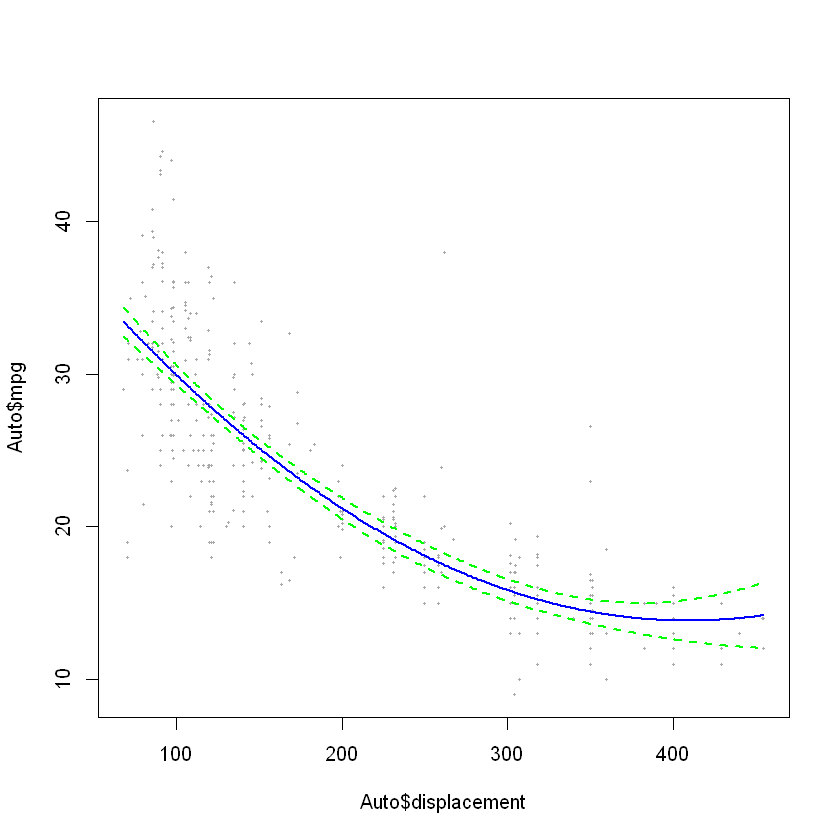

In [67]:
displacement.pred <- seq(from = min(Auto$displacement),to = max(Auto$displacement))
best.poly.model <- glm(mpg~poly(displacement,2),data = Auto)
poly.pred <- predict(best.poly.model,newdata = list(displacement = displacement.pred),se = TRUE)
se.bands <- cbind(poly.pred$fit + 2*poly.pred$se,poly.pred$fit - 2*poly.pred$se)
plot(Auto$displacement,Auto$mpg,pch = 20,cex = 0.5,col = "darkgray")
lines(displacement.pred,poly.pred$fit,type = "l",col = "blue",lwd = 2)
matlines(displacement.pred, se.bands, col = "green",lwd = 2, lty = 2)

In [59]:
sspline.fit.loocv <- smooth.spline(Auto$horsepower,Auto$mpg,cv = TRUE)
sspline.fit.loocv

Warning message in smooth.spline(Auto$horsepower, Auto$mpg, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

Call:
smooth.spline(x = Auto$horsepower, y = Auto$mpg, cv = TRUE)

Smoothing Parameter  spar= 0.8467999  lambda= 0.00815723 (15 iterations)
Equivalent Degrees of Freedom (Df): 5.784761
Penalized Criterion (RSS): 2506.079
PRESS(l.o.o. CV): 18.92578

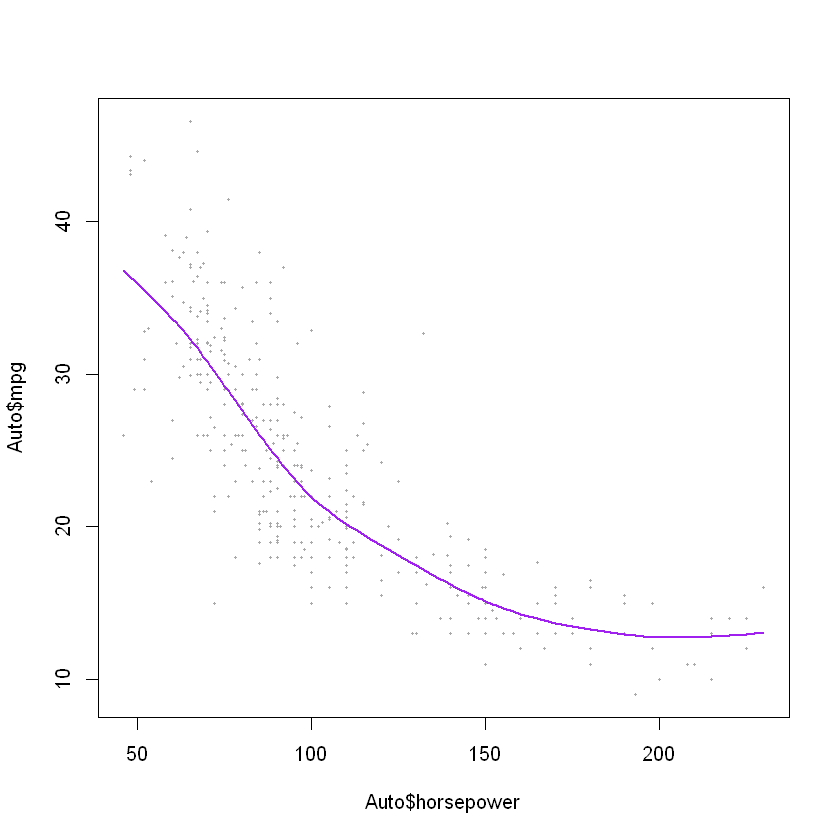

In [60]:
plot(Auto$horsepower,Auto$mpg,col = "darkgray",pch = 20,cex = 0.5)
lines(sspline.fit.loocv,col = "purple",lwd = 2)

In [71]:
Auto[Auto$horsepower > 200,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
14,14,8,455,225,3086,10.0,70,1,buick estate wagon (sw)
26,10,8,360,215,4615,14.0,70,1,ford f250
28,11,8,318,210,4382,13.5,70,1,dodge d200
68,11,8,429,208,4633,11.0,72,1,mercury marquis
95,13,8,440,215,4735,11.0,73,1,chrysler new yorker brougham
96,12,8,455,225,4951,11.0,73,1,buick electra 225 custom
117,16,8,400,230,4278,9.5,73,1,pontiac grand prix


In [61]:
sspline.fit.loocv <- smooth.spline(Auto$weight,Auto$mpg,cv = TRUE)
sspline.fit.loocv

Warning message in smooth.spline(Auto$weight, Auto$mpg, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

Call:
smooth.spline(x = Auto$weight, y = Auto$mpg, cv = TRUE)

Smoothing Parameter  spar= 0.8477711  lambda= 0.0006595209 (15 iterations)
Equivalent Degrees of Freedom (Df): 10.35561
Penalized Criterion (RSS): 5818.042
PRESS(l.o.o. CV): 17.55403

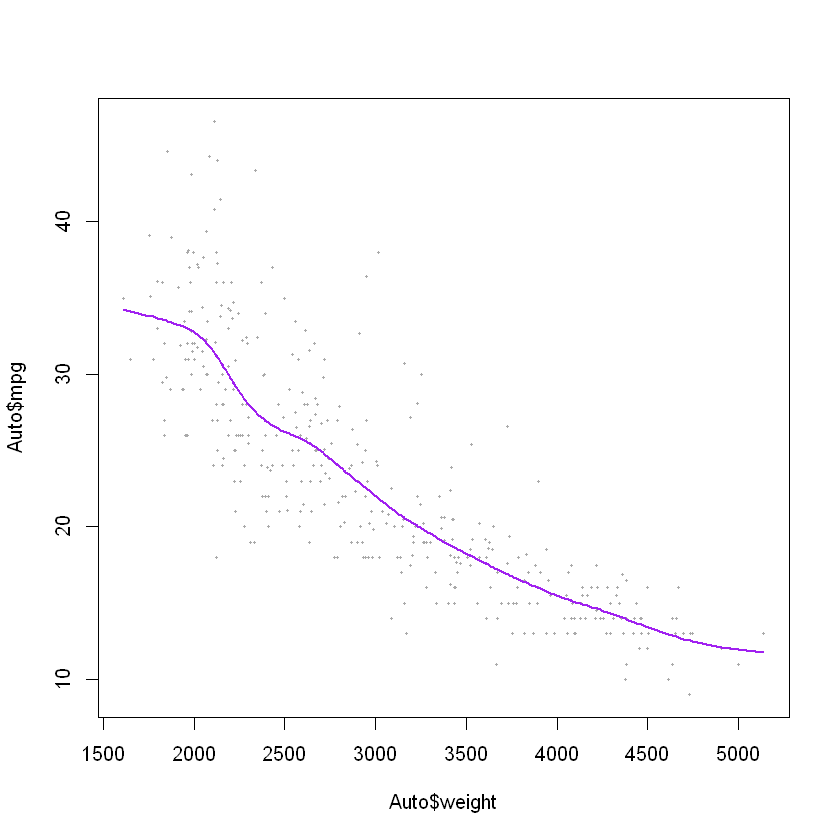

In [62]:
plot(Auto$weight,Auto$mpg,col = "darkgray",pch = 20,cex = 0.5)
lines(sspline.fit.loocv,col = "purple",lwd = 2)

In [103]:
Auto$cylinders <- factor(Auto$cylinders)
gamA.model <- gam(mpg~s(displacement,2),data = Auto)
gamB.model <- gam(mpg~s(displacement,2)+s(horsepower,df=10),data = Auto)
gamC.model <- gam(mpg~s(displacement,2)+s(horsepower,df=10)+s(weight,df = 6),data = Auto)
gamD.model <- gam(mpg~s(displacement,2)+s(horsepower,df=10)+s(weight,df = 6)+cylinders,data = Auto)

anova(gamA.model,gamB.model,gamC.model,gamD.model, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
389.0000,7516.650,NA,NA,NA
379.0001,5831.565,9.999918,1685.0850,1.513380e-20
373.0000,5462.185,6.000055,369.3801,2.435954e-04
369.0000,5284.983,4.000000,177.2028,1.478666e-02


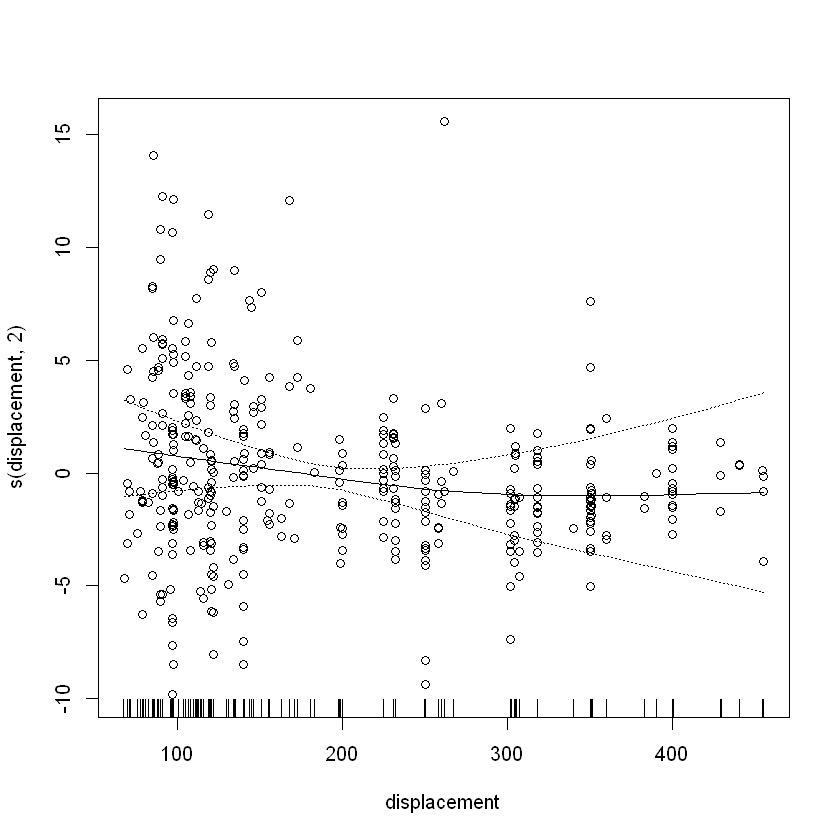

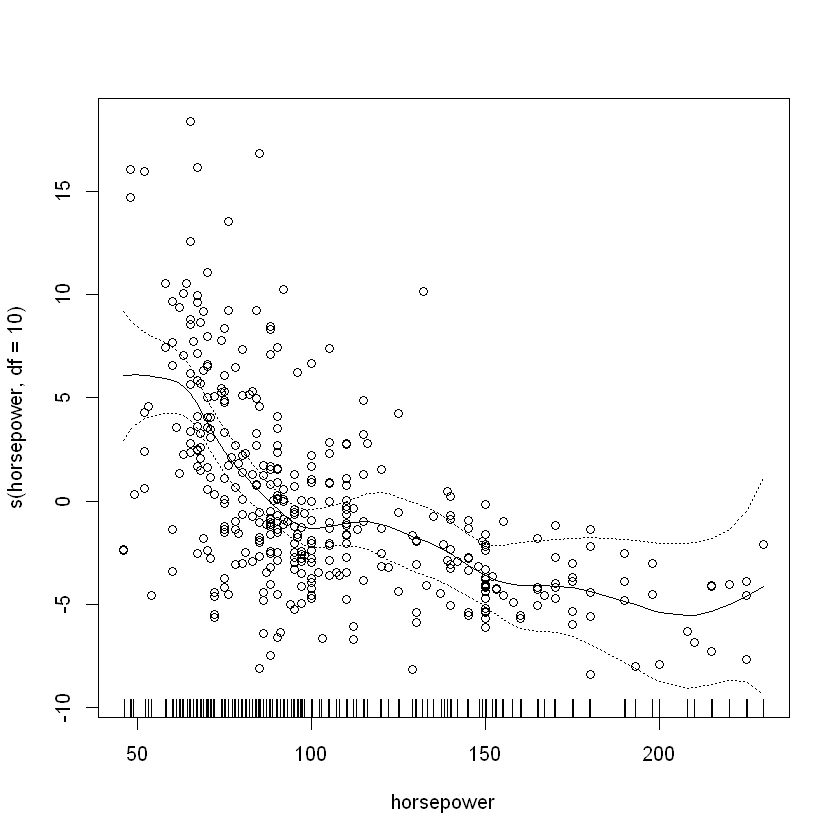

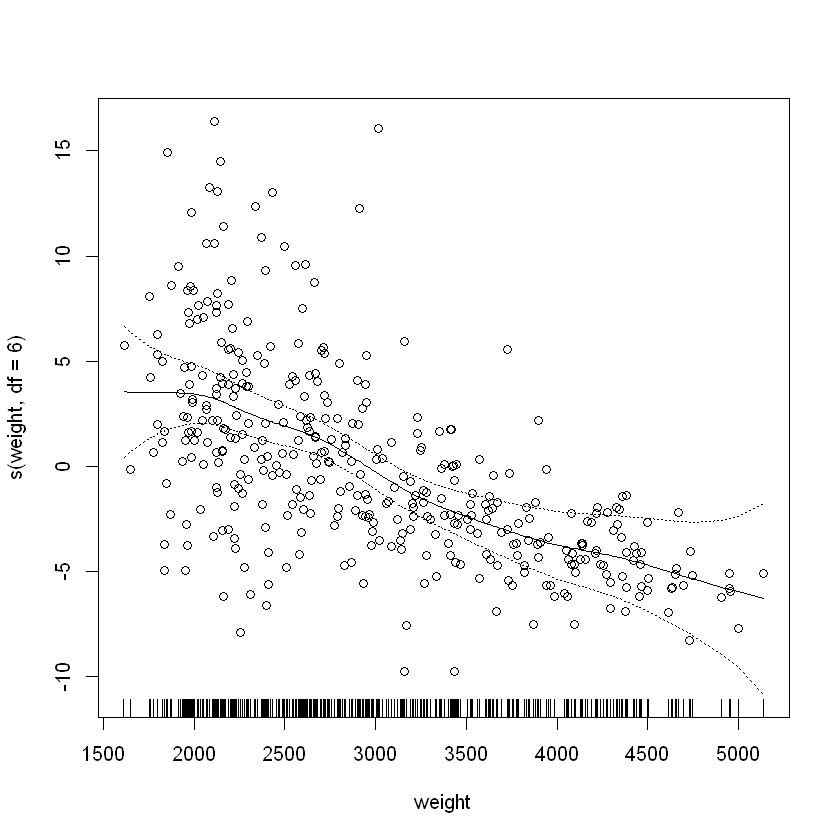

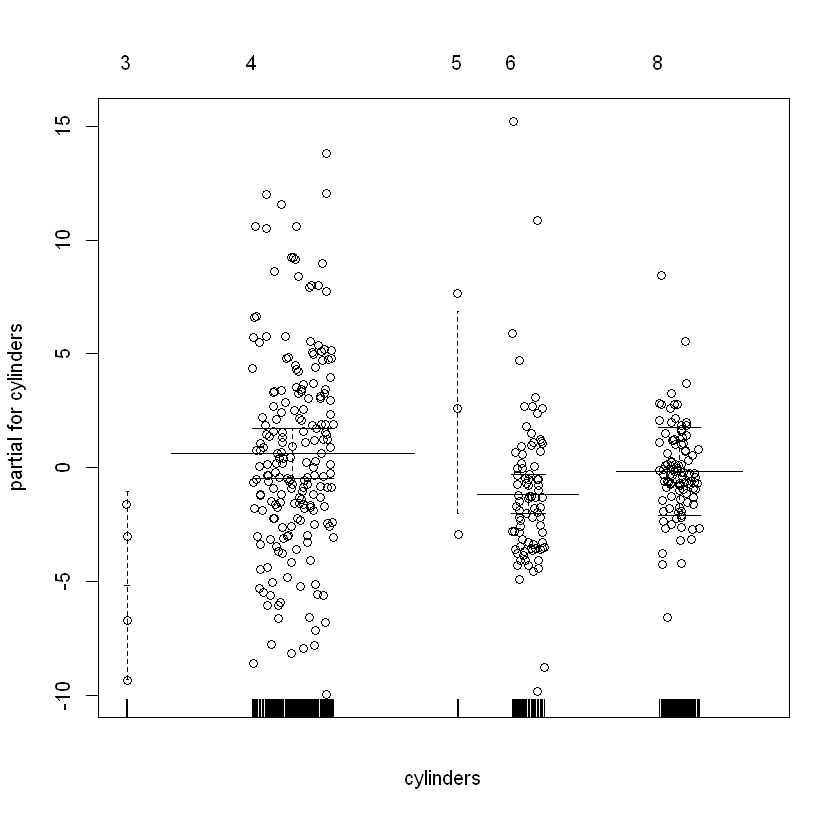

In [104]:
plot.Gam(gamD.model, se= TRUE, residuals = TRUE)

In [78]:
gam.pred <- predict(gamD.model,newdata = Auto)

In [66]:
summary(gamD.model)


Call: gam(formula = mpg ~ s(displacement, 2) + s(horsepower, df = 10) + 
    s(weight, df = 6) + cylinders, data = Auto)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-10.6127  -2.1521  -0.2248   1.8150  16.3874 

(Dispersion Parameter for gaussian family taken to be 14.3224)

    Null Deviance: 23818.99 on 391 degrees of freedom
Residual Deviance: 5284.983 on 369 degrees of freedom
AIC: 2180.182 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df  Sum Sq Mean Sq   F value    Pr(>F)    
s(displacement, 2)       1 15106.5 15106.5 1054.7411 < 2.2e-16 ***
s(horsepower, df = 10)   1   686.3   686.3   47.9153 1.981e-11 ***
s(weight, df = 6)        1   507.5   507.5   35.4329 6.146e-09 ***
cylinders                4   271.6    67.9    4.7412  0.000966 ***
Residuals              369  5285.0    14.3                        
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
      

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
14,14,8,455,225,3086,10.0,70,1,buick estate wagon (sw)
26,10,8,360,215,4615,14.0,70,1,ford f250
28,11,8,318,210,4382,13.5,70,1,dodge d200
68,11,8,429,208,4633,11.0,72,1,mercury marquis
95,13,8,440,215,4735,11.0,73,1,chrysler new yorker brougham
96,12,8,455,225,4951,11.0,73,1,buick electra 225 custom
117,16,8,400,230,4278,9.5,73,1,pontiac grand prix
